통계 확률 모델이 있음. 우리가 배운 확률 분포를 기반으로 모수를 추정하는데 그런 확률 모델을 가지고 해왔는데, 거기에 문제를 제대로 해결하기 위해서 통계적 모델이 나옴. 가장 대표적인게 회귀모델. 
머신러닝도 통계적 모델을 기반으로 하지만, 그런 영역을 더 확대해서 통계적 모델로 해결하지 못했던 부분까지 발전함. 통계적인 모델을 넘어서는 머신러닝, 딥러닝 모델들이 있음. 그 이상의 문제들을 해결함.

지금까지 추정의 개념정도만 했고 이제부터는 가설과 검증, 통계 모델을 하고 싸이클런 기반으로 하는 머신러닝 할 예정. (0728 stat1 파일 참고하기)


- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요
- 1변량 데이터의 t검정
    - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
    - t값 = (표본평균 - 모평균) / 표준오차
    - t값이 크면 유의미한 차이가 있다고 판단
- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률): 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준: 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음.

### 1. 1표본 t 검정 : 풀어서

In [2]:
# t 검정 - 귀무가설 : 과자의 무게는 50g이다.
import pandas as pd
junk_food = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/stat/5_8_jfw.csv')
jfood = junk_food.weight
jfood.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [4]:
# 표본 평균 구하기
import numpy as np
mu = np.mean(jfood)
mu

55.38496619666667

In [5]:
# 자유도
df = len(jfood)-1
df

19

In [6]:
# 표준 오차 (루트 N분에 편차(시그마))
sigma = np.std(jfood, ddof=1)
se = sigma / np.sqrt(len(jfood))
se

1.9579276805755885

In [7]:
# t value
t_value = (mu-50)/se
t_value

2.7503396831713434

In [8]:
# P value(유의수준)을 통해 t value가 유의수준에 있는지 확인 0.05보다 작으면 귀무가설 기각
from scipy import stats
alpha = stats.t.cdf(t_value, df=df) #얘는 p value 외의 가운데 값
(1-alpha) * 2 #양측검정이기 때문에

0.012725590012524268

### 1 표본 t 검정 : 함수

In [9]:
# 간단하게 하는 t 검정, 50은 모평균
# t 검정 : t값, p값
# p값(유의확률)이 유의수준 0.05보다 작으므로 귀무가설 기각
# '과자의 무게는 50그람이 아니다'라고 할 수 있다. 
stats.ttest_1samp(jfood, 50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

- 대응표본 t 검정 : 약을 먹기 전과 후의 체온의 차이를 보는 경우 사용 (동일한 표본집단의 차), 단측검증도 가능(약을 먹은 후 체온이 낮다)
- 독립표본 t 검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용. welch 근사법이라고 불리는 방법을 이용하여 p 값 계산(welch 검정)

- 단측검정, 우측검정, 양측검정, 좌측검정 다 가능

## 2 대응표본 t검정 : 약 먹은 전후 온도

In [3]:
pt_data = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/stat/5_9_ptt.csv')
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [11]:
before = pt_data.query('medicine=="before"')['body_temperature']
after = pt_data.query('medicine=="after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [13]:
# 평균값이 0과 다른지 검정
# 여기서의 귀무가설 : 약을 먹기전후의 차이가 없다(차이가 0이다)
# 나온 결과에 따르면 귀무가설을 기각함. 0.05 > p value 이기때문. 따라서 유의미한 차이가 있다고 주장할 수 있다. 
from scipy import stats
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

## 3. 독립표본 t검정 
- 두개의 독립된 표본간의 검증. 대응표본은 동일한 표본집단이라면 독립표본은 별도의 집단.   
- 예 - 약을 먹은 집단과 먹지 않은 집단간의 비교

In [14]:
# 평균치
mean_bf = np.mean(before)
mean_af = np.mean(after)
# 분산
sigma_bf = np.var(before, ddof=1)
sigma_af = np.var(after, ddof=1)
# 샘플 사이즈
m = len(before)
n = len(after)
# t 값
t_value = (mean_af-mean_bf) / np.sqrt((sigma_bf/m + sigma_af/n))
t_value

3.1557282344421034

In [16]:
# equal_var = False : 분산이 다르다고 가정한 t검정(welch 검정)
# 결과에 따르면 귀무가설 기각, 유의마한 차이가 있다고 결론
stats.ttest_ind(after, before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

## 카이제곱 검정 : 독립성 검정의 분할표 및 가설 설정
## 귀무가설 : 두 범주형 변수 사이에 연관이 없다(독립이다.)
## 대립가설 : 두 범주형 변수 사이에 연관이 있다.(종속이다.)

In [18]:
click_data = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/stat/5_10_cd.csv')
click_data
# 클릭하는 것과 색깔의 연관성 알아보기, 얘는 범주형임

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [19]:
# 분할표 
cross = pd.pivot_table(data=click_data, values='freq',
                    aggfunc='sum', index='color',
                    columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [20]:
# 카이스퀘어 통계량 p값, 자유도, 기대도수표
# 카이스퀘어 검정시 기대도수가 전부 5이상이어야 함
stats.chi2_contingency(cross, correction=False) #파라미터값을 보정을 안하겠다는 의미

# p값이 0.05보다 작으므로 두 변주형 변수 사이의 연관이 없다는 귀무가설을 기각함. 따라서 색에 따라
# 버튼을 클릭하는 것이 유의미하다고 할 수 있다. 
# 또한, 전부 5이상이기 때문에 유의함. 

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

- 카이제곱 검정(chi-squared test) 또는 χ²검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법.  
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.  
- 독립성 검정과 동질성 검정은 분할표와 가설설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.  
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상이ㅡ 모집단에서 표본 추출하여 분할표를 만듦.  
[독립성 검정 사례 ]어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 불할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정  
[동질성 검정 사례]세 가지 토양의 종류(진흙, 모레, 로움)에 따른 새로운 잡정 식물의 성장상태를 알기 위해 진흙 65군데, 모레 60군데, 로움 60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정.

# 과제 
Q. '/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/5_2_shoes.csv'을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사하여 수직으로 결합해 8행 3열의 데이터프레임 df로 만드세요.
- 교차분석표를 만드세요(values='sales', aggfunc='sum', index='sotre', columns='color')
- 독립성 검정을 수행하세요.


In [21]:
import pandas as pd
df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/5_2_shoes.csv')
df

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


## 수리모델 : 현상을 수식으로 표현한 모델, 맥주 매상=20+4*기온 (y=ax+b)
- 확률모델 : 확률적인 표현이 있는 모델. 확률분포를 사용. 맥주 매상 ~ N(20F4 기온, 시그마2). 맥주 매상은 20+4\*기온+e,e ~ N(0,시그마2)를 따른다. 맥주 매상은 20+4\*기온에 대해 노이즈 평균이 0, 분산이 시그마2인 정규분포를 따른다.(오차가 노이즈라는 뜻 여기서는 시그마2가 노이즈)  
- 통계모델 : 데이터에 적합하게 구축된 모델. 맥주 매상 ~N(10+5\*기온,시그마2) 확률모델의 구조를 생각하면서 데이터에 적합하게 파라미터를 조정해가며 통계모델을 구축  
- 확률분포와 통계모델 : 모집단에서 랜덤 샘플링을 하여 표본을 얻는 행동은 모집단 분포를 따 르는 난수를 발생시키는 것과 같다. 통계모델을 사용하면 확률분포의 모수(파라미터)의 변화 패턴을 명확히 할 수 있다.즉 언급한 모델은 '기온이 올라가면 맥주 매상의 평균값이 증가한 다'와 같은 구조라는 것을 알 수 있다.통계모델에 의한 예측은 기온이라는 독립변수를 얻는 것 이 조건인 매상의 확률분포 즉 조건부 확류분포의 형태로 얻을 수 있으며 예측값의 대표값은 조건부 기댓값을 사용한다. 기온이 10도C일 때의 매상 예측은 기댓값이 60,분산이 시그마2인 정규분포를 따르는 매상 데이터를 얻을 것이라는 주장이 된다.  
- 모델링에 초점 : 날씨와 세일이라는 2가지 영향을 동시에 평가하는 통계모델을 만든다면 더욱 올바른 효과를 분석할 수 있다. 
    - 통계모델은 잠정적인 세계의 모형으로 · 통계모델을 구축 시 파라미터의 추정을 틀리게 하면 올바른 해석을 할 수 없다.  
    - 분석에 사용하는 데이터에 문제가 있는 경우도 올바른 모델을 만들 수 없다.   
- 통계모델에 사용되는 파라미터를 계수라고 하는 반면 머신러닝에서는 가중치라고 표현  

** 이때 기온이 개입하므로 조건부 확률임  
** 단순한 확률모델에 비해 '예측'할 수 있다는 기능이 있다.  
** 파라미터를 결정하는 것뿐만 아니라 모델 구조를 잘 짜야한다. 예를들어 기온이라는 조건만을 따지게 되면 한계가 있음. 그래서 기온과 sale(가격 인상,인하)가 전부 매상에 영향을 주기 때문에 기온만 놓고 보면 한계가 있을 수 있는 것임. 그래서 모델링에 파라미터를 정하는 것도 중요하지만 모델의 구조 즉, 변수를 선택하는게 굉장히 중요하다. 


In [25]:
!pip3 install statsmodels

     |████████████████████████████████| 9.6 MB 21.6 MB/s 
     |████████████████████████████████| 231 kB 25.1 MB/s 
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [80]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
beer = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/7_1_beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


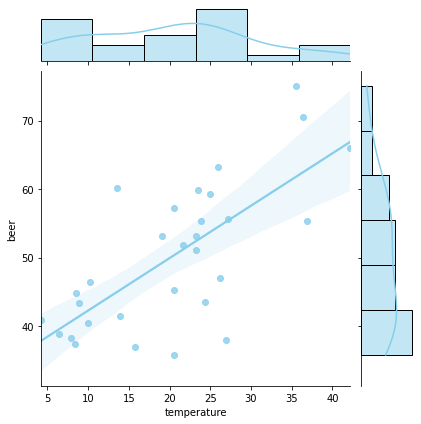

In [31]:
sns.jointplot(x='temperature', y='beer',kind='reg',data=beer,color='skyblue')

In [32]:
# 자승하는 이유 : 폭이 클 수록 컴퓨터가 학습을 빨리함, 절댓값 씌우는 것보다 자승하는게 컴퓨터 로드가 덜 걸림
# 노이즈의 합은 0, 많이 퍼져있으면 분산이 큰 것, 적게 퍼져있으면 작은 것. 
# 최소 자승법 : 따라서 오차의 합이 최소가 되면 분산이 적고 관계선이 더 확실한 것.
lm_model = smf.ols(formula="beer~temperature",
                    data = beer).fit()

In [33]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        14:14:20   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 내필기
observation : 관측치
residuals : 잔차, 관측치 - 변수(두개)
Model 자유도 : 변수 - 1
adj.R-squred : 수정결정계수  
F-statistic : F값, F통계량으로 분산분석시 사용, F가 크면 오차의 분산이 크다는 것. Fb가 크면 효과의 분산크기가 오차의 분산크기보다 큼. 오차에 비해서 효과의 역량이 더 큼. 그러면 좋은거다. 

이런걸 분산분석, anova라고 함. 

t분포에 누적함수를 사용해서 t 통계량으로 p값구했던 것처럼 분산분삭도 f분포가 있음. f분포의 cdf를 사용. f분포의 cdf로 p value를 구해서 그게 0.05 이하가 되면 귀무가설을 기각
Prob(F-statics) : F통계값으로 구한 p값
Log-likelihood : 최대 로그 우도
AIC:낮을수록 좋음, 변수 선택시 사용(전진선택법, 후진소거법, 단계적 선택법에서 변수를 선별할 때 사용)
BIC: AIC와 비슷한데 잘 안씀

y=0.7654\*x +34.6102 -> coef는 계수랑 절편
p>|t|는 피값, 뒤에는 신뢰구간. 보니까 신뢰구간보다 작다

omnibus 잔차의 정규성을 구하고자하는 것. -> 귀무가설이 정규분포를 따른다. 대립가설은 잔차가 정규분포와 다르다가 되는 것. 
skew 왜도
kurtosis 첨도(정규분포의 첨도는 3)
durbin-watson : 시계열 분석시 많이 씀, 2정도면 문제없다고 판단함
jarque-bera : 옴니버스와 같은 것. (정규분포 가정을 만족하는지 안하는지)


#### 선생님 필기
해석 : 기온이 맥주 매상에 영향을 미친다는 것을 알 수 있음  
- std err : 계수의 표준오차  
- P>|t| : 귀무가설을 계수의 값이 0이라고 했을 때의 p값  
95% 신뢰구간의 하측신뢰한계와 상측신뢰한계  
  
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것  
  
- Df Models : 사용된 독립변수의 수  
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨  
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수  
결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표  
모델에 의한 추측치가 종속변수의 실젯값과 일치하면 R-squared는 1이 됨  
종속변숫값의 변동 크기를 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합을 분해할 수 있는데 결정계수는 전체   변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 할 수 있음  
- F-statistic, Prob(F-statistic) : 분산분석 결과  
분산분석은 평균값의 차이를 검정하는 방법  
분산분석을 사용할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는 지 검정할 경우임  
모집단이 정규분포를 따르는 데이터에 대해서만 적용. 수준 사이의 분산값이 다르지 않다는 조건도 충족해야 함  
F비 = 효과의 분산 크기 / 오차의 분산 크기. F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단  
분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석 또는 ANOVA라고 부름  
F분표의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05 이하가 되면 귀무가설을 기각함  
- Log-Likelihood : 최대로그우도  
- AIC : 아카이케 정보 기준  
- BIC : 베이즈 정보 기준  

- Prob(Omnibus), Prob(JB)는 잔차의 정규성에 대한 검정결과  

- 귀무가설 : 잔차가 정규분포를 따른다, 대립가설 : 잔차가 정규분포와 다르다.  
p값이 0.05보다 크다고 해도 검정의 비대칭성이 있으므로 정규분포라고 주장할 수 없음  
- Skew(왜도) : 히스토그램의 좌우비대칭방향과 그 정도를 측정하는 지표.  
왜도가 0보다 크면 오른쪽 자락이 길어짐. 정규분포의 왜도는 0  
- Kurtosis(첨도) : 히스토그램의 뾰족함을 측정하는 지표. 정규분포의 첨도는 3  
- Durbin-Watson : 잔차의 자기상관을 체크하는 지표. 2 전후라면 문제 없다고 판단.  
시계열데이터를 분석하는 경우 반드시 이 지표를 체크. 잔차에 자기상관이 있으면 계수의 t검정 결과 신뢰 못함  
- Durbin-Watson 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법 등의 사용 검토 필요  

### 과제
Q. 선형모델을 생성하고 summary를 출력하여 모델에 대한 통계지표들을 해석하세요.  
    
df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/auto-mpg.csv')  
df_mw=df[['mpg','weight']]
df_mw.head()

In [35]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.aic

227.94194972563105

In [37]:
lm_model = smf.ols('beer~temperature', data=beer).fit()
lm_model.aic

# null 모델에 비해서 aic가 더 낮으므로 temperature가 유의미하다는 뜻

208.90902935575437

In [38]:
# 예측
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [39]:
# 기온이 0도일 때 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [40]:
# 파라미터값
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [86]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
print(beta1)
beta0 + beta1*temperature 

0.7654275877604529


49.91876701095054

In [42]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [43]:
# 잔차계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [87]:
# 잔차 = 실제값 - 예측값
y_hat = beta0 + beta1*beer.temperature
print(y_hat)
(beer.beer - y_hat).head()

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
Name: temperature, dtype: float64


0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [45]:
# 결정계수 : 설명력, r-squared
mu = np.mean(beer.beer)
y = beer.beer 
yhat = lm_model.predict()

np.sum((yhat-mu)**2)/np.sum((y-mu)**2)  
#오차부분이 빠짐. 전차의 변화에서 모델에의한 변화를 나눈것이므로 모델이 이 변화를 설명할 수 있는 정도


0.503959323061187

In [47]:
# 수정 결정계수 : 독립변수의 수가 늘어나면 결정계수가 커지는 경향을 조정하기 위하여 독립변수가 늘어나는 것에 대해
# 패널티 부여
n = len(beer.beer)
s = 1 #독립변수의 수
1 - ((np.sum(resid**2)/ (n-s-1)) /
    (np.sum((y-mu)**2) / (n-1)))
    

0.48624358459908534

In [48]:
lm_model.rsquared_adj 

0.48624358459908534

In [49]:
# 종속변수의 변동 크기는 모델로 설명 가능한 변동과 설명 못하는 잔차제곱합으로 분해할 수 있다.

np.sum((y-mu)**2)

3277.1146666666655

In [50]:
np.sum((yhat-mu)**2) + sum(resid**2)


3277.114666666669

<AxesSubplot:ylabel='Density'>

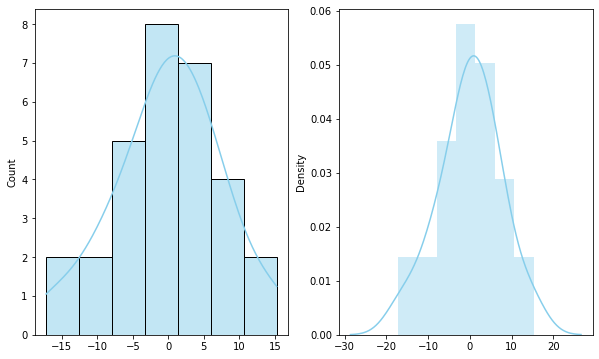

In [56]:
# 잔차 그래프
import warnings
warnings.filterwarnings('ignore')
ax = plt.figure(figsize=(10,6))
ax1 = ax.add_subplot(1,2,1)
ax2 = ax.add_subplot(1,2,2)
sns.histplot(resid, color='skyblue', kde=True, ax=ax1)
sns.distplot(resid, color='skyblue', ax=ax2)

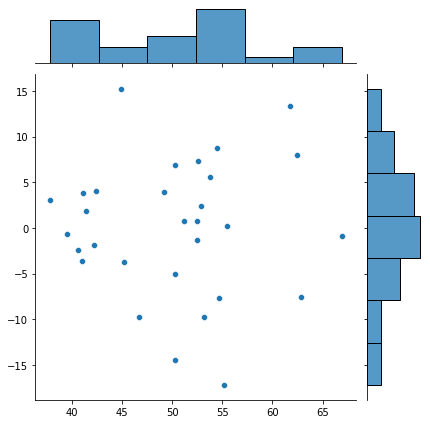

In [57]:
# 잔차의 산포도 : x축 적합도, y축 잔차
sns.jointplot(lm_model.fittedvalues,resid)

# 이 둘은 어떤 관계가 있음 안되기 때문에 그림이 잘 나온 것임


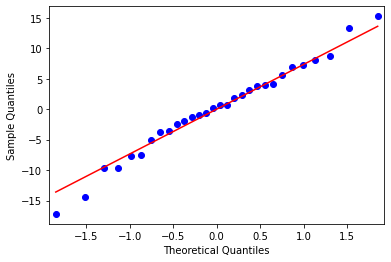

In [60]:
# Q-Q 플롯 : 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
# 빨간 그래프가 이론적인 분위점을 이은 선
fig = sm.qqplot(resid,line='s')

#### 분산분석
- 정규선형모델 중에서 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 하며 분산분석은 또한 검정방법의 이름이기도 함
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로 평균값의 차이를 검정하는 방법
- 평균값의 차이 겁정은 t검정을 이용하지만 세 개 이상의 수준간의 평균값 차이 검정은 분산분석을 사용
- 모집단이 정규분포을 따르는 데이터에 대해서만 적용, 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는데 활용
- "온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?"와 같은 과제를 분석
- 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이 중에서 다른 치료법보다 나은 치료 방법이 있는가?
- 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법 보다 나은가?
- 서로 다른 두 학교의 학생들이 같은 시험을 치르려고 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?
- 독립변수는 정성적이거나 정량적일 수 있으며 예에서 온도는 정량적이며 약은 정성적임
- 온도가 인자라고 하면 10도, 20도, 30도 와 같이 몇 개의 값을 가지며 인자를 구성하는 몇 가지 특성을 수준이라 함
각 수준은 독립적인 모집단을 구성하고 이에 따라 확률변수가 정의됨
- 분산분석은 서로 다른 수준을 갖는 모집단들을 대상으로 그들의 평균에 의미가 있는 차이가 있는지 없는지를 검정
- 인자가 하나인 분산분석을 일원분산분석, 둘이면 이원분산분석, 셋 이상이면 통틀어 다원분산분석이라고 함
- 집단 또는 수준은 동일한 독립변수 내의 묶음을 의미한다. “씨리얼의 종류” 라는 독립변수가 있다면, 코코볼, 콘푸로스트,오레오 오즈는 그 아래의 세 수준이 될 수 있다. “칼로리” 라는 독립변수의 경우에는 가당과 무가당 두 가지 수준을 가질 수 있음
- 일원분산분석에서는 하나의 인자의 수준만 처리가 되나 이원분산분석에서는 두 인자의 수준들이 조합되어 처리됨
- 다음의 가정에 기초
    - 모든 모집단의 확률변수는 정규분포를 갖는다
    - 모든 모집단의 확률변수의 분산은 sigma squared로 동일하다
    - 표본은 무작위로 추출되면 모든 표본은 서로 독립적이다


#### 검정의 다중성
- 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 검정의 다중성이라 함
- 검정을 반복하면 귀무가설이 기각되기 귀워지고 1종 오류를 저지를 확률이 높아진다.
- 맑음, 비, 흐림의 세가지 수준으로 매상이 달라지는지 검정할 때 맑음 대비 비, 비 대비 흐림, 맑음 대비 흐림의 3가지 조합으로 t검정을 실시하면 검정의 다중성 문제가 발생
- 반면 분산분석을 수행하면 맑음이나 비와 같은 개별 카테고리를 보는 것이 아니라 날씨에 따라 매상이 다른지 여부를 한번의 검정으로 판단

### 분산분석의 직감적 사고방식 : F비
- 귀무가설 : 수준 간의 평균값에 차이가 없다. <->  대립가설 : 수준간의 평균값에 차이가 있다.
- 수준이란 날씨, 물고기 종류 등과 같은 카테고리 변수를 의미
- 분산분석에서는 데이터의 변동을 오차와 효과로 분리하여 F비 계산
- F비 = 효과의 분산 크기/ 오차의 분산 크기
- 효과의 크기를 군간 변동, 오차의 크기를 군내변동이라 하고 데이터의 분산을 2개의 변동으로 나눈 뒤 그 비율을 최한 것을 통계량으로 사용하여 검정 시행
- 분산의 비율을 취한 통계량으로 검정을 시행하므로 분산분석(ANOVA)이라고 부름
- F비가 크면 오차에 비해 효과의 영향이 클 것 이라고 판단
- F분포의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05이하가 되면 귀무가설을 기각한다.

In [64]:
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({
        "beer" : beer,
        "weather":weather
})
w_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

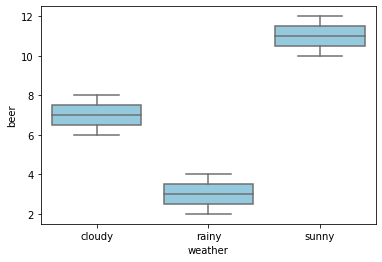

In [65]:
sns.boxplot(x="weather", y="beer", data=w_beer, color='skyblue')

In [66]:
# 날씨별 매상의 평균치 
w_beer.groupby('weather').mean()

,beer
weather,
cloudy,7.0
rainy,3.0
sunny,11.0


In [67]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균
effect = [7,7,3,3,11,11]

In [69]:
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음
mu_effect = np.mean(effect)
print(mu_effect)
sq_model = np.sum((effect-mu_effect)**2)
sq_model 

7.0


64.0

In [71]:
resid = w_beer.beer - effect 
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [72]:
# 군내변동 : 오차의 평균값은 0
sq_resid = np.sum(resid**2)
sq_resid

6

In [73]:
df_model = 2 #군간변동의 자유도(수준의 종류 수에 따라 좌우 : 수준(3) - 1)
df_resid = 3 #군내변동의 자유도(샘플 사이즈와 수준의 종류 수 : 샘플(6)-수준(3))

# 군간 평균제곱(분산)
v_model = sq_model/df_model 
v_model

32.0

In [75]:
#  군내 평균제곱(분산)
v_resid = sq_resid / df_resid
v_resid

2.0

In [77]:
# F비 : 군간 분산과 군내 분산의 비 
f_ratio = v_model / v_resid
f_ratio

16.0

In [120]:
# p 값, 0.05보다 작음으로 날씨에 의해 매상이 유의미하게 변화한다고 판단. 
1 - stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)


0.02509457330439091

In [121]:
# 한번에 분산분석 하기
anova_model = smf.ols('beer~weather', data=w_beer).fit()


In [122]:
w_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   beer     6 non-null      int64 
 1   weather  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [83]:
# 분산분석표 : 군간, 군내편차제곱합, 자유도, F비, p값
sm.stats.anova_lm(anova_model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
weather,2.0,64.0,32.0,16.0,0.025095
Residual,3.0,6.0,2.0,NaN,NaN


In [84]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [88]:
# 독립변수가 여럿인 모델
sales = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/stat/7_3_lmm.csv')
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


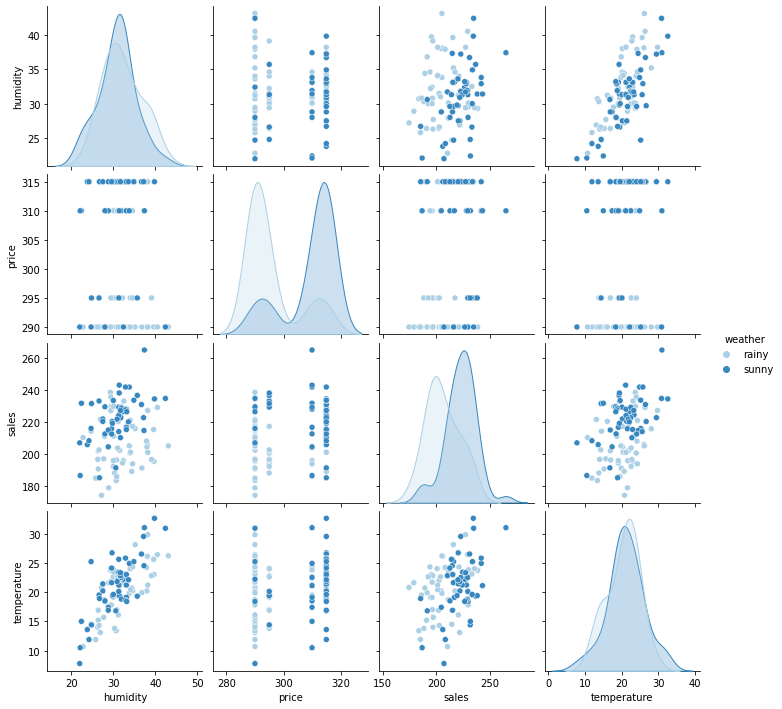

In [91]:
sns.pairplot(data=sales,hue='weather',palette='Blues')

In [92]:
# 독립변수를 변화시켜가면서 보기, 잘못된 분석 : 가격이 오르면 매상이 증가
lm = smf.ols('sales~price', data=sales).fit()
lm.params

Intercept    113.645406
price          0.332812
dtype: float64

In [93]:
# 분산분석표, F통계량이 0.02라 유의미한 것, 뭔가 이상함
# 잘못된 분석
sm.stats.anova_lm(lm,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
price,1.0,1398.392322,1398.392322,4.970685,0.028064
Residual,98.0,27570.133578,281.327894,NaN,NaN


In [101]:
# rainy이고 sunny일때 가격 차이가 나는데 그냥 세일즈와 가격만 보면 그 차이를 못봄
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


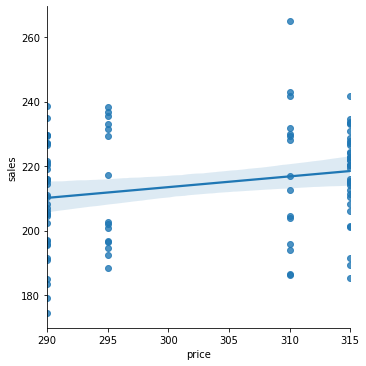

In [100]:
# 매상을 상품가격으로만 분석하여 문제의 소지발생
# 가격과 세일즈로만 하면 올라간다.
sns.lmplot(x='price',y='sales',data=sales,
           palette='gray')

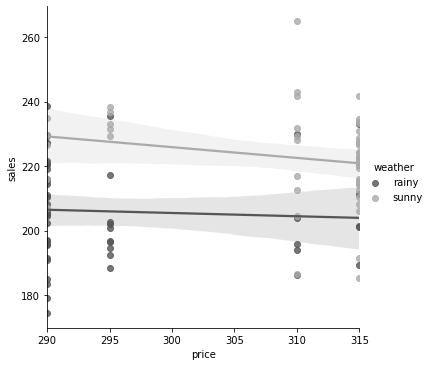

In [99]:
# weather가 개입해서 보니까, 가격이 올라감에 따라서 세일즈가 내려감. 
sns.lmplot(x='price',y='sales',data=sales,
            hue='weather',palette='gray')
즉, 변수를 적절하게 선택해야함. 

In [102]:
# 독립변수가 4개인 모델 추정
lm_sales=smf.ols("sales ~ weather + humidity + temperature + price"
                , data = sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [104]:
# 모든 독립변수가 유의미함 : 잘못되지 않았을까 따져봐야함.
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [106]:
# 변수의 자리를 바꿔서 다시 해보기 : 유의미한 변수가 3개가됨. humidity가 유의미하지 않은 변수로 나옴
lm_sales2=smf.("sales ~ weather + temperature + humidity + price"
                , data = sales).fit()
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [110]:
# 분산분석 대신 회귀계수의 t검정을 수행하면 문제는 발생되지 않는다.
# 검정 다중성의 문제가 발생함(t검정을 하면 여러번 검정해야하니까) : 1종오류 발생할 확률이 커짐
# 원래는 분산분석이 한 번에 수행해주는데 이번엔 문제가 발생해서 t검정을 해보는 것임
lm_sales.summary().tables[1] #humidity가 유의미하지 않음


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [111]:
lm_sales2.summary().tables[1] #순서 바꿨는데도 t값이 다 똑같음
# 즉 t값으로 하면 안바뀌는데 검정의 다중성문제가 있기 때문에 해결책이 아님.
# 이걸 해결하기 위해서 나온게 파이2아노파

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [114]:
# Type || ANOVA , 문제를 안일으키는 아노바, type=2를 입력
mod_full = smf.ols("sales ~ weather + humidity +temperature + price"
                ,sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3)

# 그리고 이걸보면 humidity는 유의미하지 않음


,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [115]:
# 습도하고 기온이 상관관계가 강해서 기온이라는 독립변수가 포함돼 있으면
# 습도는 매상에 영향을 끼친다고 볼 수 없음
mod_non_humi = smf.ols("sales ~ weather +temperature + price"
                ,sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)
# 이제 f값을 봐야함. 다 유의미한 값들이니까!

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [119]:
# 교호작용도 볼 수 있음 *하면 : 근데 유의미한 값이 없음
mod_non_humi = smf.ols("sales ~ weather * temperature * price"
                ,sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6425.428,1.0,36.086,0.000
temperature,4278.061,1.0,24.026,0.000
weather:temperature,71.995,1.0,0.404,0.526
price,803.336,1.0,4.512,0.036
weather:price,96.890,1.0,0.544,0.463
temperature:price,390.204,1.0,2.191,0.142
weather:temperature:price,357.056,1.0,2.005,0.160
Residual,16381.404,92.0,NaN,NaN
